### Build a linear regression model to estimate the points value for wines from the USA. Using simple language,identify which factors are most important in obtaining a good rating.

In [107]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import feature_selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [108]:
wine = pd.read_csv("Data/winemag-data-130k-v2.csv")

In [109]:
data = wine.loc[wine['country'] == "US"]

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 2 to 129967
Data columns (total 14 columns):
Unnamed: 0               54504 non-null int64
country                  54504 non-null object
description              54504 non-null object
designation              36908 non-null object
points                   54504 non-null int64
price                    54265 non-null float64
province                 54504 non-null object
region_1                 54226 non-null object
region_2                 50511 non-null object
taster_name              37730 non-null object
taster_twitter_handle    34741 non-null object
title                    54504 non-null object
variety                  54504 non-null object
winery                   54504 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 6.2+ MB


In [111]:
#Determining unique in categoricals 

data_categorical = data.select_dtypes(include=['object']).columns
print('Total number of rows: %s' %len(data))
for i in range(len(data_categorical)):
    category = data_categorical[i]
    print(category, ': %s' %len(data[category].unique()))

Total number of rows: 54504
country : 1
description : 50449
designation : 14184
province : 27
region_1 : 265
region_2 : 18
taster_name : 16
taster_twitter_handle : 13
title : 50229
variety : 257
winery : 5375


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


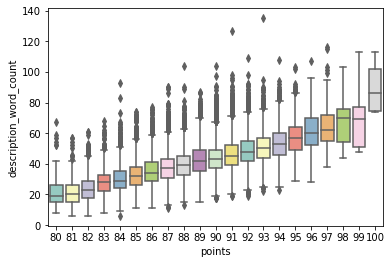

In [112]:
data['description_word_count'] = data['description'].apply(lambda x: len(str(x).split(" ")))
sns.boxplot(x = 'points', y = 'description_word_count', palette = 'Set3', data = data, linewidth = 1.5);

In [113]:

col_to_delete = ['country', 'Unnamed: 0' ,'description' , 'designation', 
                 'title', 'taster_twitter_handle']

data = data.drop(col_to_delete, axis = 1)

data.head()

,points,price,province,region_1,region_2,taster_name,variety,winery,description_word_count
2,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,28
3,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,Riesling,St. Julian,33
4,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks,41
10,87,19.0,California,Napa Valley,Napa,Virginie Boone,Cabernet Sauvignon,Kirkland Signature,36
12,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,Cabernet Sauvignon,Louis M. Martini,28


In [114]:
print("Old Size : " , data.shape[0])
print("Duplicates: " , data.duplicated().sum())
data.drop_duplicates(inplace=True) 
print("New Size : " , data.shape[0])

Old Size :  54504
Duplicates:  4167
New Size :  50337


In [115]:
data.isna().any()

points                    False
price                      True
province                  False
region_1                   True
region_2                   True
taster_name                True
variety                   False
winery                    False
description_word_count    False
dtype: bool

In [116]:
data[["region_1"]] = data[["region_1"]].fillna(value="unknownR1")
data[["region_2"]] = data[["region_2"]].fillna(value="unknownR2")
data[["taster_name"]] = data[["taster_name"]].fillna(value="unknownT")

In [117]:
data[["price"]] = data[["price"]].fillna(data["price"].mode()[0])

In [118]:
data.isna().any()

points                    False
price                     False
province                  False
region_1                  False
region_2                  False
taster_name               False
variety                   False
winery                    False
description_word_count    False
dtype: bool

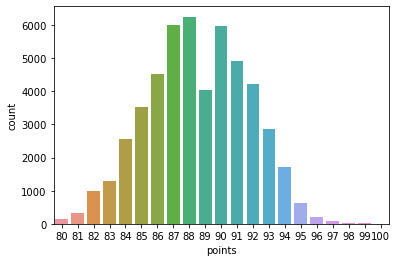

In [119]:
sns.countplot(data['points'])

In [120]:
def CalcOutliers(df_num): 
    '''
    
    Leonardo Ferreira 20/10/2018
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [121]:
CalcOutliers(data['price'])

Identified lowest outliers: 0
Identified upper outliers: 819
Identified outliers: 819
Non-outlier observations: 49518
Total percentual of Outliers:  1.6539


In [122]:
CalcOutliers(data['points'])

Identified lowest outliers: 0
Identified upper outliers: 16
Identified outliers: 16
Non-outlier observations: 50321
Total percentual of Outliers:  0.0318


Skewness=-0.056
Kurtosis=-0.449


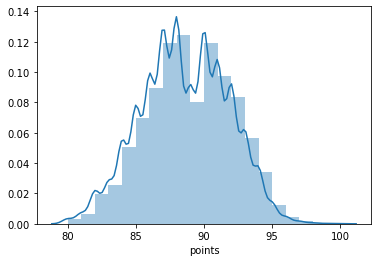

In [123]:
print('Skewness=%.3f' %data['points'].skew())
print('Kurtosis=%.3f' %data['points'].kurtosis())
sns.distplot(data['points'], bins=20, kde=True);

Skewness=11.157
Kurtosis=574.117


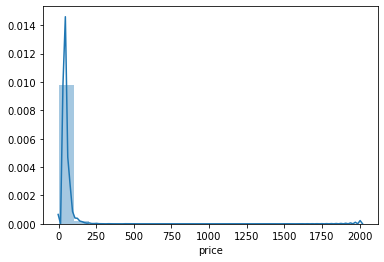

In [124]:
print('Skewness=%.3f' %data['price'].skew())
print('Kurtosis=%.3f' %data['price'].kurtosis())
sns.distplot(data['price'], bins=20, kde=True);

In [125]:
data['price_log'] = np.log(data['price'])

Skewness=0.223
Kurtosis=0.247


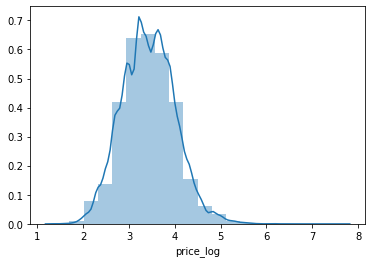

In [126]:
print('Skewness=%.3f' %data['price_log'].skew())
print('Kurtosis=%.3f' %data['price_log'].kurtosis())
sns.distplot(data['price_log'], bins=20, kde=True);

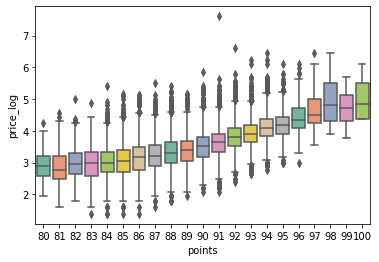

In [127]:
sns.boxplot(x = 'points', y = 'price_log', palette = 'Set2', data = data, linewidth = 1.5);

In [128]:
# The overall trend that prices go up as points increase is obvious. That is, there exists a positive correlation between these two. Of course, among the wines that have the same points, their prices can vary a lot.

In [129]:
data['points'].corr(data['price'])

0.45428161428383884

In [130]:
data['points'].corr(data['price_log'])

0.5540755361766307

In [131]:
data['taster_name'].value_counts()

unknownT              15965
Virginie Boone         8681
Paul Gregutt           8647
Matt Kettmann          5714
Sean P. Sullivan       4419
Jim Gordon             3759
Anna Lee C. Iijima     2192
Alexander Peartree      383
Susan Kostrzewa         224
Carrie Dykes            129
Joe Czerwinski          103
Michael Schachner        71
Fiona Adams              24
Lauren Buzzeo            19
Christina Pickard         5
Roger Voss                2
Name: taster_name, dtype: int64

In [132]:
data['region_2'].value_counts()

Central Coast        10211
Sonoma                8360
Columbia Valley       7451
Napa                  6358
unknownR2             3684
Willamette Valley     3131
California Other      2492
Finger Lakes          1631
Sierra Foothills      1345
Napa-Sonoma           1084
Central Valley         991
Southern Oregon        838
Oregon Other           670
Long Island            607
North Coast            533
Washington Other       495
South Coast            251
New York Other         205
Name: region_2, dtype: int64

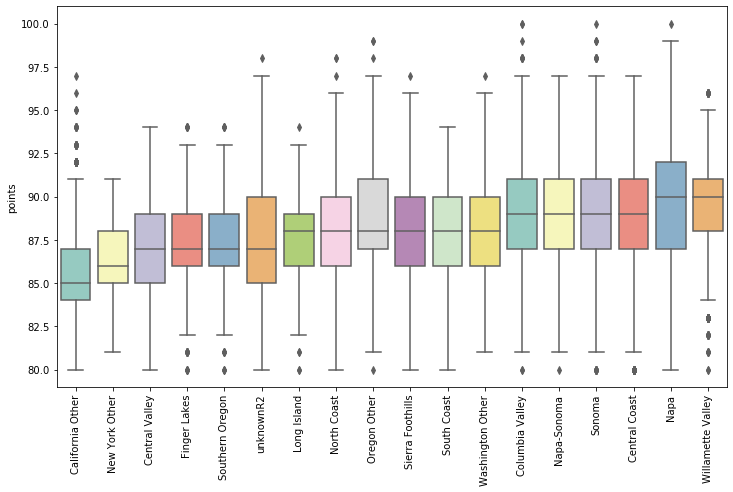

In [133]:
fig, ax = plt.subplots(1, 1, figsize = (12, 7))
col_order = data.groupby(['region_2'])['points'].aggregate(np.median).reset_index().sort_values('points')
p = sns.boxplot(x = 'region_2', y = 'points', palette = 'Set3', data = data, order = col_order['region_2'], linewidth = 1.5)
plt.setp(p.get_xticklabels(), rotation = 90)
ax.set_xlabel('');

In [99]:
#The median points of wines from Willamette Valley, Columbia Valley, and Napa seem to be the same. These three regions are all located in the US. Actually the regions listed in the plot are all located in the US. It seems that US wine regions are populated well while regions of other countries are not in region_2 column.

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50337 entries, 2 to 129967
Data columns (total 10 columns):
points                    50337 non-null int64
price                     50337 non-null float64
province                  50337 non-null object
region_1                  50337 non-null object
region_2                  50337 non-null object
taster_name               50337 non-null object
variety                   50337 non-null object
winery                    50337 non-null object
description_word_count    50337 non-null int64
price_log                 50337 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 5.5+ MB


In [135]:
data = pd.get_dummies(data=data, columns=['province','region_1','region_2', 
                                         'taster_name', 'variety', 'winery'])

In [136]:
data.head()

,points,price,description_word_count,price_log,province_America,province_Arizona,province_California,province_Colorado,province_Connecticut,province_Hawaii,...,winery_kukkula,winery_m2 Wines,winery_next:,winery_pb,winery_the Ghost of 413,winery_un4seen,winery_Écluse,winery_Élevée Winegrowers,winery_Órale,winery_àMaurice
2,87,14.0,28,2.639057,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,13.0,33,2.564949,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,65.0,41,4.174387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,87,19.0,36,2.944439,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,87,34.0,28,3.526361,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50337 entries, 2 to 129967
Columns: 5962 entries, points to winery_àMaurice
dtypes: float64(2), int64(2), uint8(5958)
memory usage: 289.2 MB


In [142]:
data = data.drop('price', axis = 1)

In [143]:
X = data.loc[:, data.columns != 'points']
y = data['points'].values.reshape(-1,1)

In [144]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

#print('RMSE:', np.sqrt(metrics.mean_squared_error(10**(y_test), 10**(predictions))))

In [148]:
predictions

array([[8.41784286e+01],
       [8.87184906e+01],
       [8.90508652e+01],
       ...,
       [2.66687203e+08],
       [9.27542038e+01],
       [8.65272293e+01]])